In [340]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [341]:
import pandas as pd


file_path = '/content/gdrive/My Drive/IS 497 - Marketing Analytics/Membership_Donations.xlsx'

# Load the Excel file into a pandas dataframe
df_md = pd.read_excel(file_path)


In [342]:
df_md.head()

,Lookup ID,Age,Total Donation Amount,Cumulative Lifetime Donation Years,Consecutive Years of Giving
0,10431123,73,50.0,1,1
1,10431123,73,100.0,2,1
2,10431123,73,150.0,3,1
3,10607371,39,50.0,1,1
4,10607371,39,75.0,2,1


In [343]:
# group by Lookup ID and find index of max Total Donation Amount for each group
idx = df_md.groupby(['Lookup ID'])['Total Donation Amount'].idxmax()

# use the index to retrieve the rows with max Total Donation Amount for each Lookup ID
max_donations = df_md.loc[idx]

max_donations = max_donations.drop('Age', axis=1)
max_donations['If Donated'] = 1

In [344]:
max_donations

,Lookup ID,Total Donation Amount,Cumulative Lifetime Donation Years,Consecutive Years of Giving,If Donated
2,10431123,150.00,3,1,1
7,10607371,253.00,5,1,1
9,10607960,171.75,2,2,1
24,10648019,6271.00,15,8,1
35,10675024,10433.00,11,4,1
...,...,...,...,...,...
1362,14130731,50.00,1,1,1
1363,14235611,50.00,1,1,1
1364,14245896,18.00,1,1,1
1365,14245897,18.00,1,1,1


In [345]:
file_path = '/content/gdrive/My Drive/IS 497 - Marketing Analytics/Membership File.xlsx'

# Load the Excel file into a pandas dataframe
df_m = pd.read_excel(file_path)

In [346]:
df_m

,Lookup ID,Age,Gender,Marital status,City,State,Country,Email,Class of,College,Degree,Enrolled Via,Enrollment Date
0,11488038,72,Male,Married,Clinton,Illinois,United States,Yes,1972.0,"1KL-Agr, Consumer, & Env Sciences",BS: Bachelor of Science,No record,1900-01-01
1,13663683,28,Male,Unknown,Chengdu,Sichuan,China,Yes,2018.0,1KU-Law,LLM: Master of Laws,No record,1900-01-01
2,11535019,70,Female,Married,Evergreen Park,Illinois,United States,Yes,1974.0,NaN,BA: Bachelor of Arts,No record,1900-01-01
3,12068148,59,Male,Married,Coronado,California,United States,Yes,1986.0,1KY-Applied Health Sciences,BS: Bachelor of Science,No record,1900-01-01
4,11434386,76,Female,Widow/er,Elk Grove Village,Illinois,United States,Yes,NaN,NaN,NaN,Main site,2022-02-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,11422009,66,Female,Married,Edwardsville,Illinois,United States,Yes,1978.0,1KP-Grainger Engineering,BS: Bachelor of Science,Main site,2022-02-11
766,13768074,23,Male,Married,Downers Grove,Illinois,United States,Yes,2022.0,1KT-College of Media,BS: Bachelor of Science,No record,1900-01-01
767,13805468,23,Female,Unknown,Glenview,Illinois,United States,Yes,2023.0,1KV-Liberal Arts & Sciences,BS: Bachelor of Science,Holiday Promo '22,2022-12-02
768,11457688,75,Male,Married,Monticello,Illinois,United States,Yes,1970.0,1KR-Fine & Applied Arts,BUP: Bachelor of Urban Planning,No record,1900-01-01


In [347]:
merged_df = pd.merge(df_m, max_donations, on='Lookup ID', how='left')

In [348]:
merged_df

,Lookup ID,Age,Gender,Marital status,City,State,Country,Email,Class of,College,Degree,Enrolled Via,Enrollment Date,Total Donation Amount,Cumulative Lifetime Donation Years,Consecutive Years of Giving,If Donated
0,11488038,72,Male,Married,Clinton,Illinois,United States,Yes,1972.0,"1KL-Agr, Consumer, & Env Sciences",BS: Bachelor of Science,No record,1900-01-01,NaN,NaN,NaN,NaN
1,13663683,28,Male,Unknown,Chengdu,Sichuan,China,Yes,2018.0,1KU-Law,LLM: Master of Laws,No record,1900-01-01,NaN,NaN,NaN,NaN
2,11535019,70,Female,Married,Evergreen Park,Illinois,United States,Yes,1974.0,NaN,BA: Bachelor of Arts,No record,1900-01-01,NaN,NaN,NaN,NaN
3,12068148,59,Male,Married,Coronado,California,United States,Yes,1986.0,1KY-Applied Health Sciences,BS: Bachelor of Science,No record,1900-01-01,NaN,NaN,NaN,NaN
4,11434386,76,Female,Widow/er,Elk Grove Village,Illinois,United States,Yes,NaN,NaN,NaN,Main site,2022-02-08,17114.83,39.0,24.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,11422009,66,Female,Married,Edwardsville,Illinois,United States,Yes,1978.0,1KP-Grainger Engineering,BS: Bachelor of Science,Main site,2022-02-11,5975.00,15.0,2.0,1.0
766,13768074,23,Male,Married,Downers Grove,Illinois,United States,Yes,2022.0,1KT-College of Media,BS: Bachelor of Science,No record,1900-01-01,NaN,NaN,NaN,NaN
767,13805468,23,Female,Unknown,Glenview,Illinois,United States,Yes,2023.0,1KV-Liberal Arts & Sciences,BS: Bachelor of Science,Holiday Promo '22,2022-12-02,NaN,NaN,NaN,NaN
768,11457688,75,Male,Married,Monticello,Illinois,United States,Yes,1970.0,1KR-Fine & Applied Arts,BUP: Bachelor of Urban Planning,No record,1900-01-01,NaN,NaN,NaN,NaN


In [349]:
merged_df['If Donated'] = merged_df['If Donated'].fillna(0)
merged_df['Total Donation Amount'] = merged_df['Total Donation Amount'].fillna(0)
merged_df['Cumulative Lifetime Donation Years'] = merged_df['Cumulative Lifetime Donation Years'].fillna(0)
merged_df['Consecutive Years of Giving'] = merged_df['Consecutive Years of Giving'].fillna(0)

In [350]:
merged_df

,Lookup ID,Age,Gender,Marital status,City,State,Country,Email,Class of,College,Degree,Enrolled Via,Enrollment Date,Total Donation Amount,Cumulative Lifetime Donation Years,Consecutive Years of Giving,If Donated
0,11488038,72,Male,Married,Clinton,Illinois,United States,Yes,1972.0,"1KL-Agr, Consumer, & Env Sciences",BS: Bachelor of Science,No record,1900-01-01,0.00,0.0,0.0,0.0
1,13663683,28,Male,Unknown,Chengdu,Sichuan,China,Yes,2018.0,1KU-Law,LLM: Master of Laws,No record,1900-01-01,0.00,0.0,0.0,0.0
2,11535019,70,Female,Married,Evergreen Park,Illinois,United States,Yes,1974.0,NaN,BA: Bachelor of Arts,No record,1900-01-01,0.00,0.0,0.0,0.0
3,12068148,59,Male,Married,Coronado,California,United States,Yes,1986.0,1KY-Applied Health Sciences,BS: Bachelor of Science,No record,1900-01-01,0.00,0.0,0.0,0.0
4,11434386,76,Female,Widow/er,Elk Grove Village,Illinois,United States,Yes,NaN,NaN,NaN,Main site,2022-02-08,17114.83,39.0,24.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,11422009,66,Female,Married,Edwardsville,Illinois,United States,Yes,1978.0,1KP-Grainger Engineering,BS: Bachelor of Science,Main site,2022-02-11,5975.00,15.0,2.0,1.0
766,13768074,23,Male,Married,Downers Grove,Illinois,United States,Yes,2022.0,1KT-College of Media,BS: Bachelor of Science,No record,1900-01-01,0.00,0.0,0.0,0.0
767,13805468,23,Female,Unknown,Glenview,Illinois,United States,Yes,2023.0,1KV-Liberal Arts & Sciences,BS: Bachelor of Science,Holiday Promo '22,2022-12-02,0.00,0.0,0.0,0.0
768,11457688,75,Male,Married,Monticello,Illinois,United States,Yes,1970.0,1KR-Fine & Applied Arts,BUP: Bachelor of Urban Planning,No record,1900-01-01,0.00,0.0,0.0,0.0


In [351]:
merged_df['Enrolled Via'] = merged_df['Enrolled Via'].str.strip()

In [357]:
from google.colab import files
merged_df.to_excel('/content/gdrive/My Drive/IS 497 - Marketing Analytics/Membership_Updated.xlsx', index=False)


In [352]:
merged_df.isnull().sum().sort_values(ascending=True)

Lookup ID                               0
Cumulative Lifetime Donation Years      0
Total Donation Amount                   0
Enrollment Date                         0
Consecutive Years of Giving             0
Email                                   0
If Donated                              0
City                                    0
Marital status                          0
Gender                                  0
Age                                     0
Country                                 0
Enrolled Via                            1
State                                   5
Degree                                130
Class of                              156
College                               175
dtype: int64

In [353]:
print(merged_df.dtypes)

Lookup ID                                      int64
Age                                            int64
Gender                                        object
Marital status                                object
City                                          object
State                                         object
Country                                       object
Email                                         object
Class of                                     float64
College                                       object
Degree                                        object
Enrolled Via                                  object
Enrollment Date                       datetime64[ns]
Total Donation Amount                        float64
Cumulative Lifetime Donation Years           float64
Consecutive Years of Giving                  float64
If Donated                                   float64
dtype: object


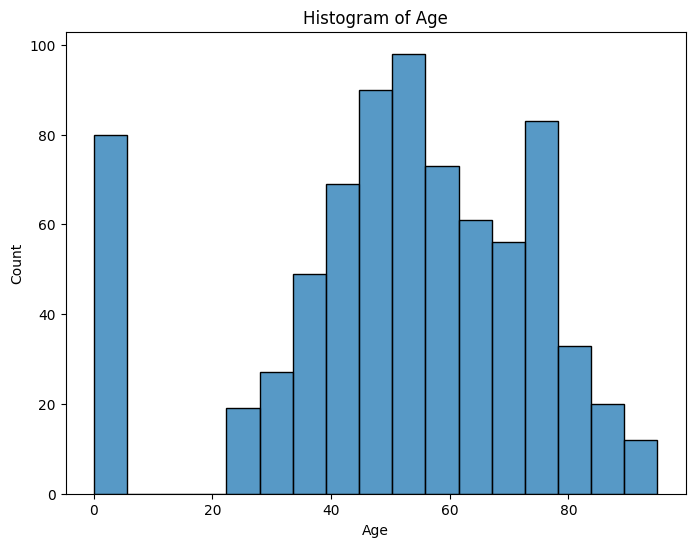

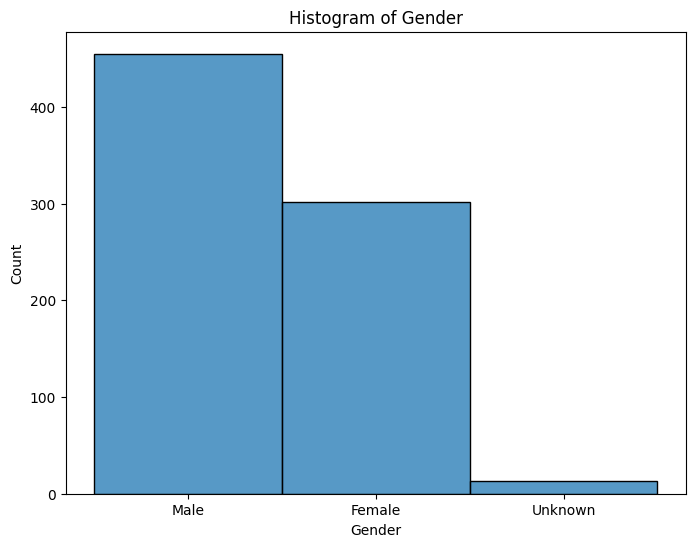

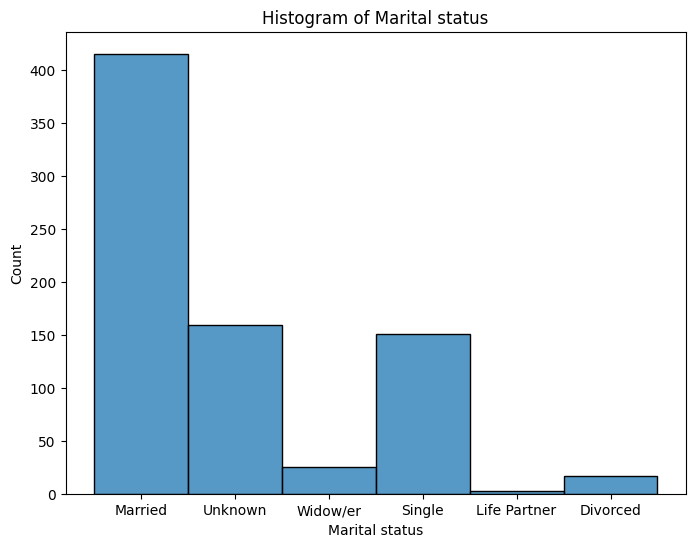

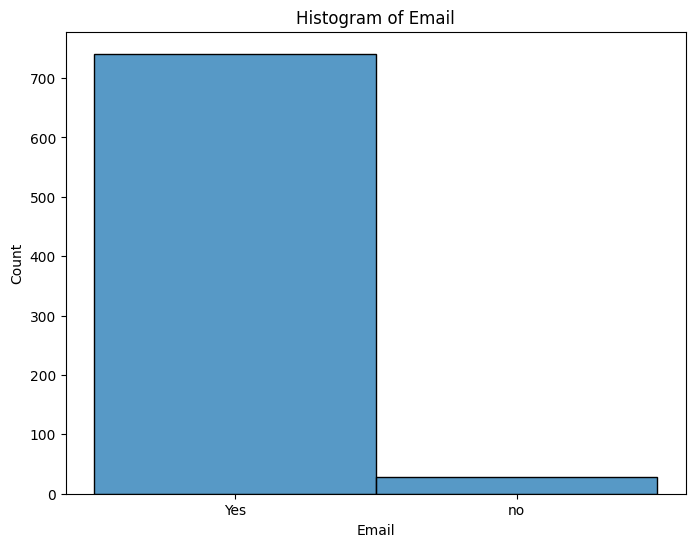

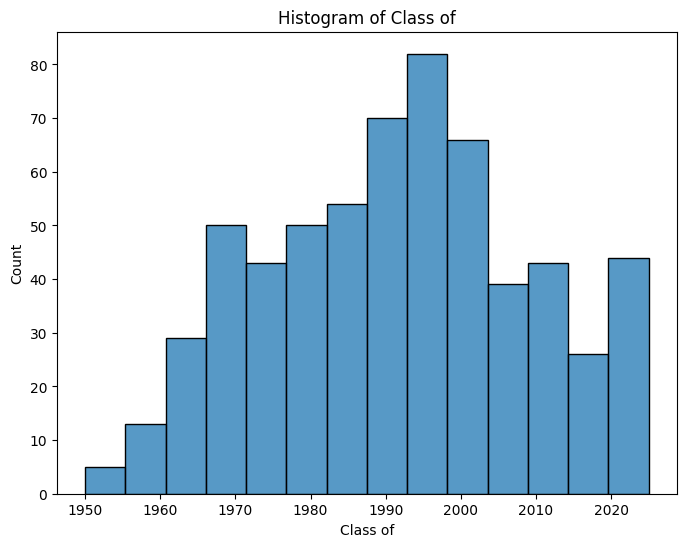

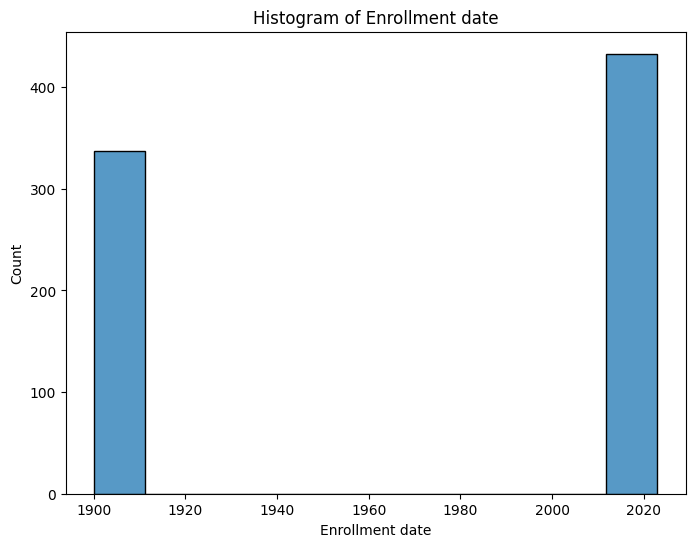

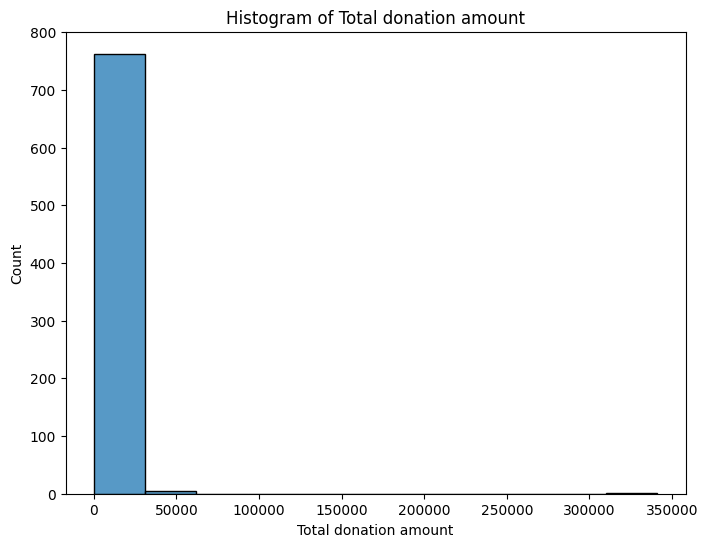

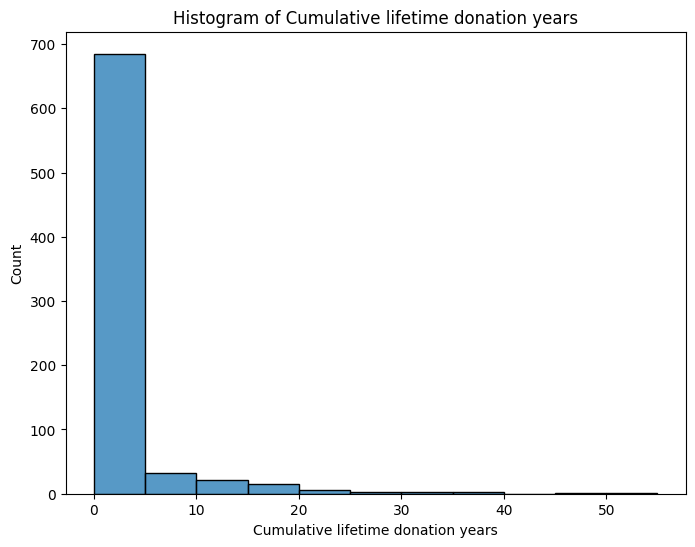

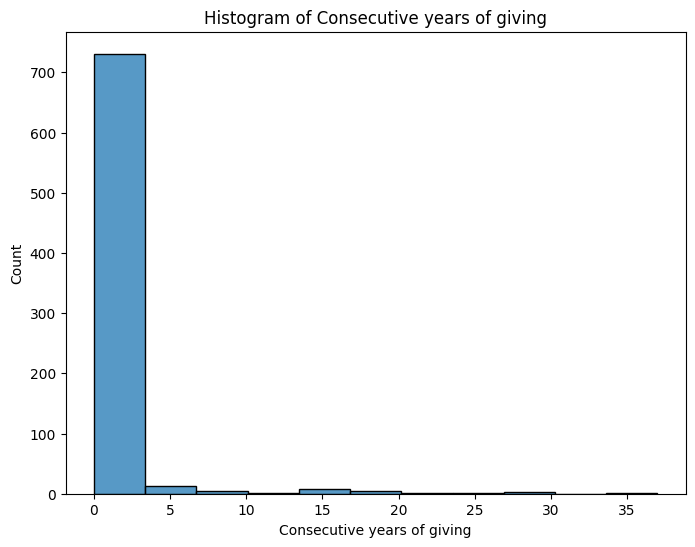

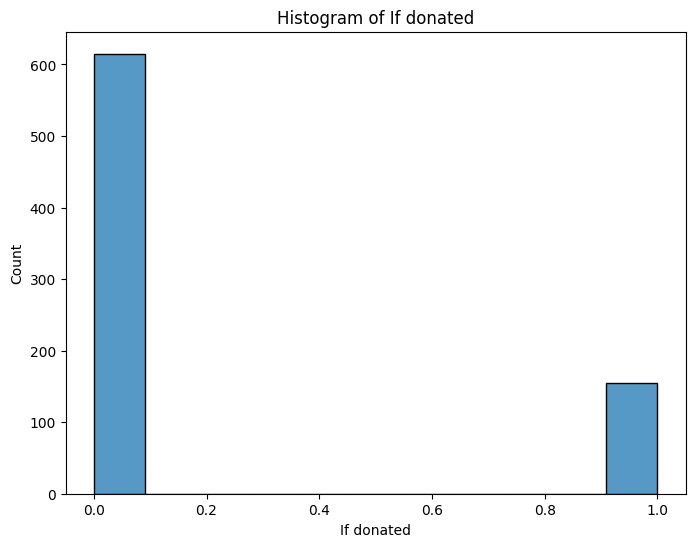

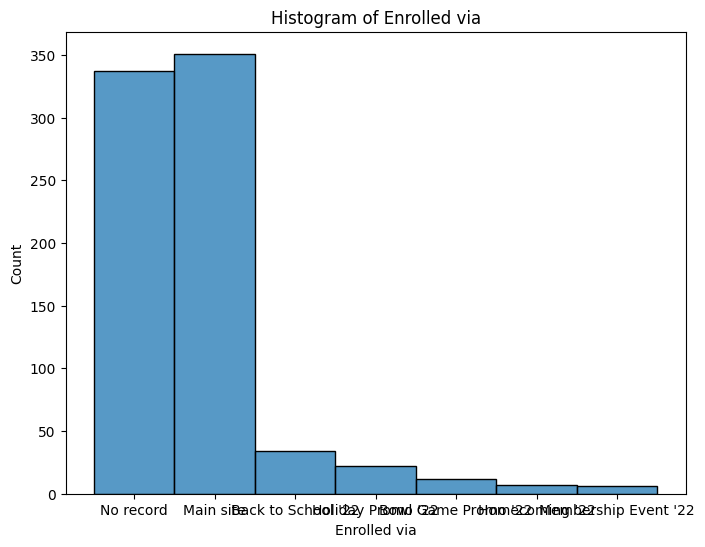

In [354]:
import matplotlib.pyplot as plt
import seaborn as sns

merged_df_final = merged_df[['Age','Gender','Marital status','Email','Class of', 
                             'Enrollment Date', 'Total Donation Amount',	
                             'Cumulative Lifetime Donation Years',	
                             'Consecutive Years of Giving', 'If Donated', 'Enrolled Via']].copy()

# Plot histograms for each variable
for col in merged_df_final.columns:
    fig, ax = plt.subplots(figsize=(8,6))
    sns.histplot(data=merged_df_final, x=col, ax=ax)
    ax.set_xlabel(col.capitalize())
    ax.set_ylabel('Count')
    ax.set_title('Histogram of ' + col.capitalize())
    plt.show()

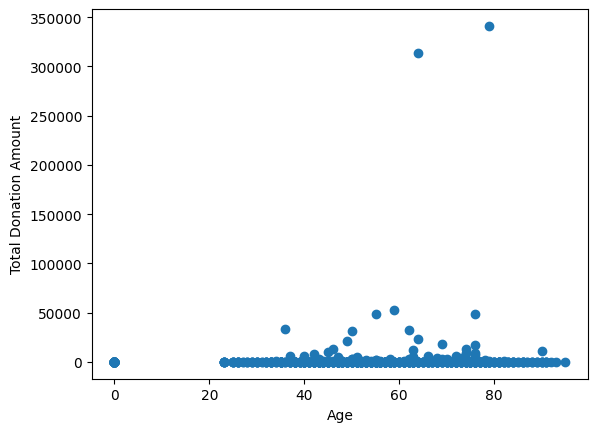

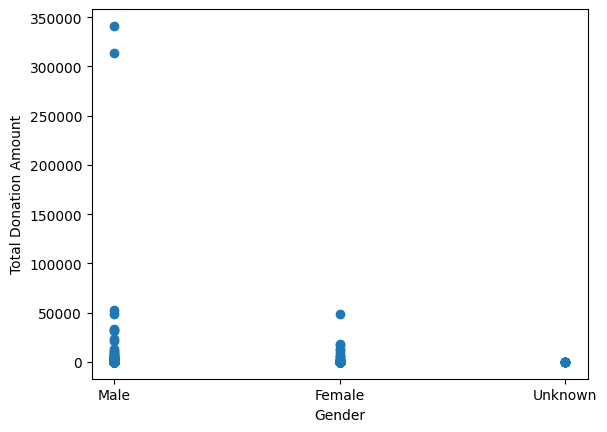

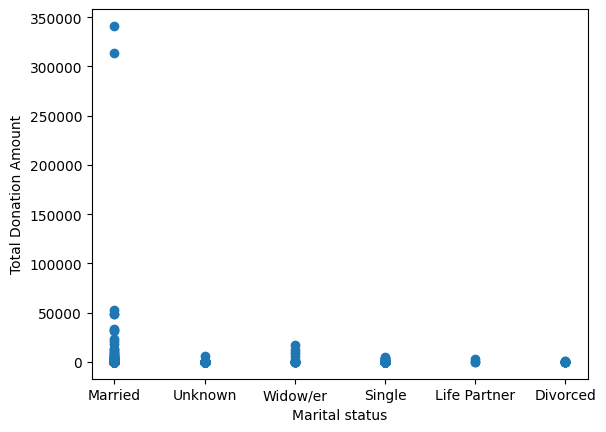

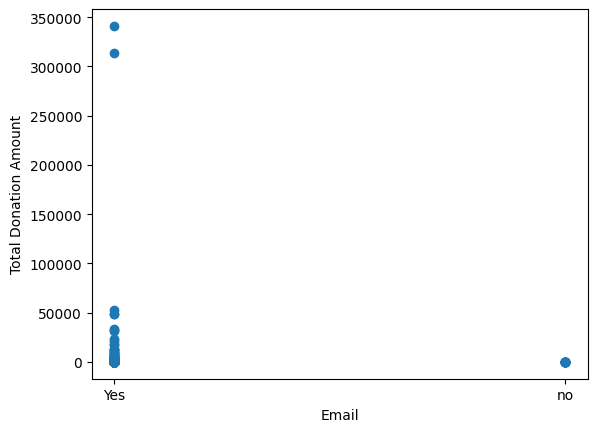

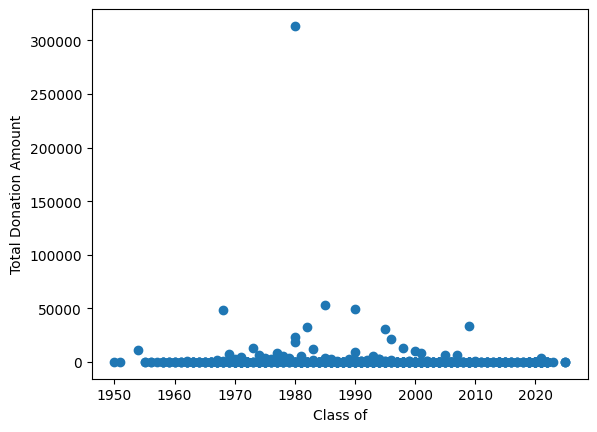

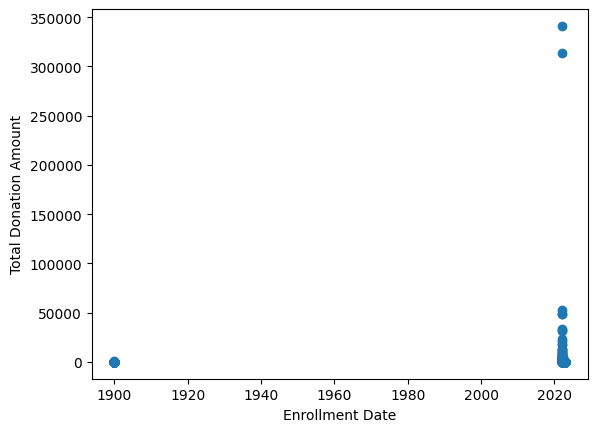

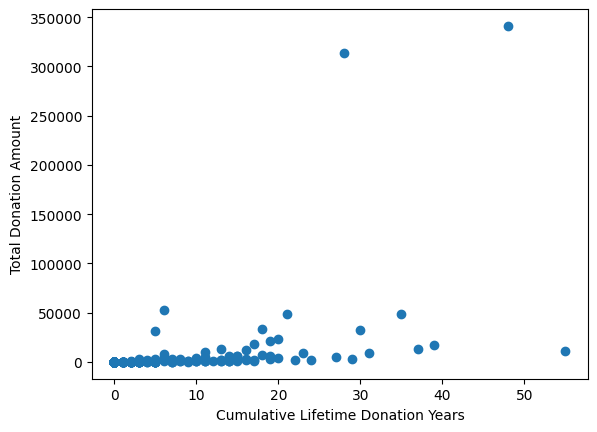

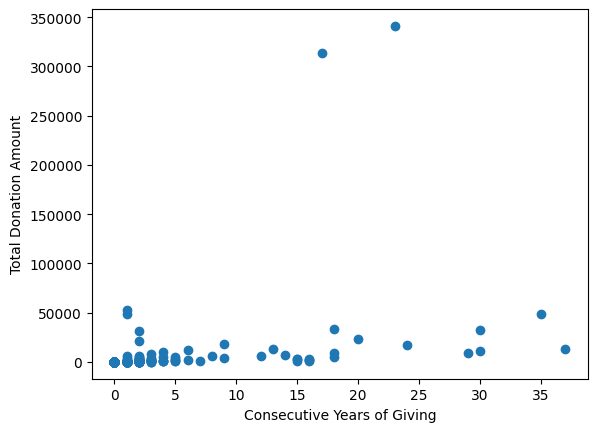

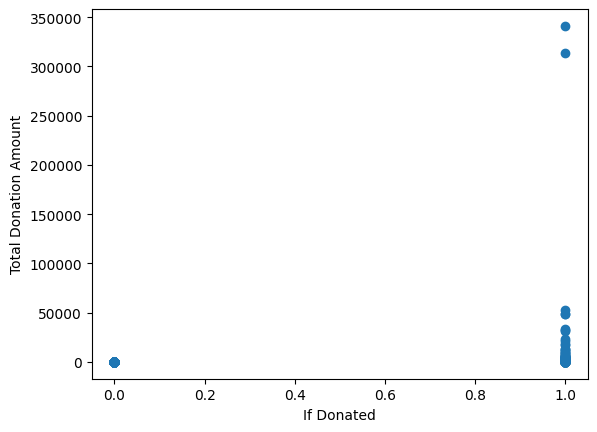

In [355]:
cols_to_plot = ['Age','Gender','Marital status','Email','Class of', 
                             'Enrollment Date', 	
                             'Cumulative Lifetime Donation Years',	
                             'Consecutive Years of Giving', 'If Donated']

# loop through the selected columns and plot a scatter plot against the 'Total Donation Amount' column
for col in cols_to_plot:
    plt.scatter(merged_df[col], merged_df['Total Donation Amount'])
    plt.xlabel(col)
    plt.ylabel('Total Donation Amount')
    plt.show()

1.   Does age have a significant impact on the total donation amount?
2.   Is there a relationship between the gender of the donor and the total donation amount?

3.   Does the marital status of a donor affect their donation behavior?

4.   Is there a correlation between the city of the donor and their total donation amount?

5.   Do donors from different states exhibit different donation behaviors?
6.   Is there a difference in donation behavior between donors from different countries?


7.   Does the college major of a donor impact their donation behavior?


8.   Is there a correlation between the enrollment date and the total donation amount?
9. Does the cumulative lifetime donation years have a significant impact on the total donation amount?
10. 
Is there a relationship between the consecutive years of giving and the total donation amount?

Hypothesis 1: There is a positive relationship between the Age and Total Donation Amount.

Hypothesis 2: Males donate more than females.

Hypothesis 3: Married individuals donate more than single individuals.

Hypothesis 4: Individuals who graduated from GIES donated more than individuals from other colleges.













